In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
votes_with_dist = pd.read_csv(os.path.join('data',r'votes_with_dist.csv'))
votes_with_dist = votes_with_dist[["Year","From country","To country","Points","distw"]]
#filter = (votes_with_dist["From country"] != "Australia") & (votes_with_dist["To country"] != "Australia")
#votes_with_dist = votes_with_dist[filter]

In [17]:
votes_with_dist

,Year,From country,To country,Points,distw
0,1975,Belgium,Belgium,0,66.77504
1,1976,Belgium,Belgium,0,66.77504
2,1977,Belgium,Belgium,0,66.77504
3,1978,Belgium,Belgium,0,66.77504
4,1979,Belgium,Belgium,0,66.77504
...,...,...,...,...,...
34078,2016,Australia,Ireland,7,16895.03000
34079,2016,Australia,Switzerland,1,16170.09000
34080,2016,Australia,Switzerland,0,16170.09000
34081,2016,Australia,Belarus,6,14713.92000


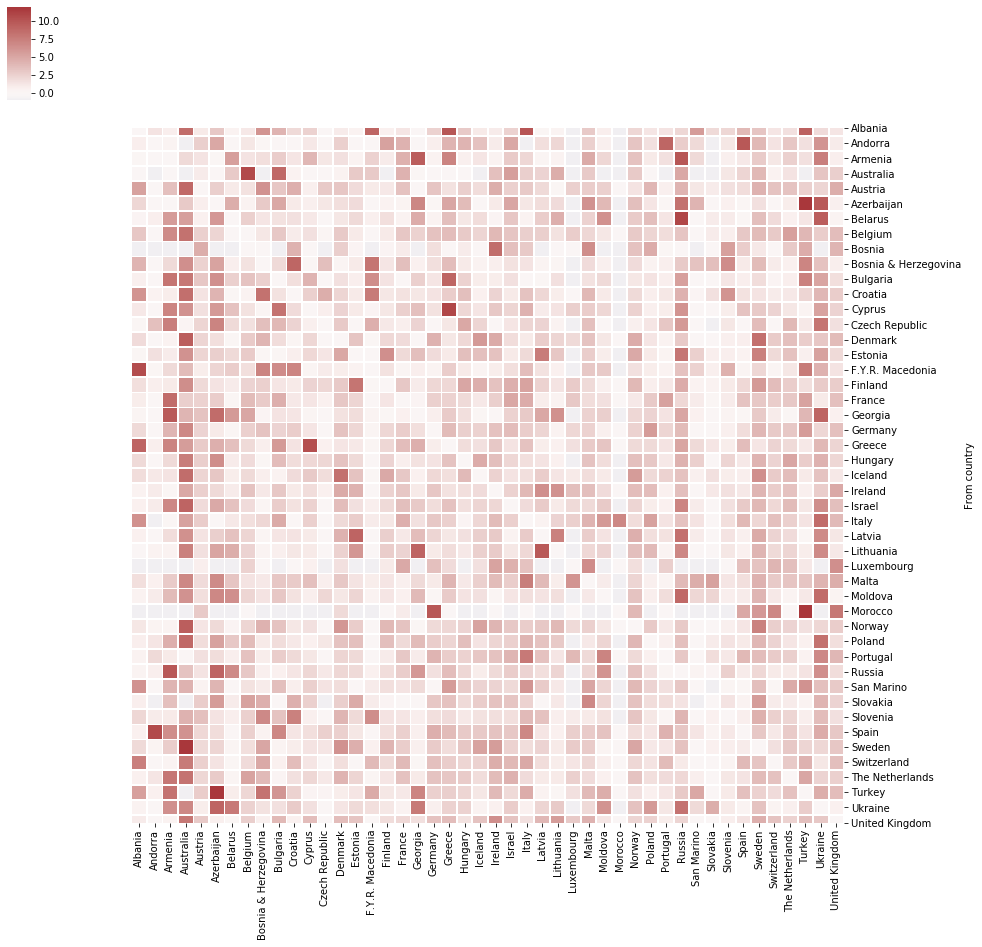

In [18]:
#avg votes
avg_votes_by_countries_pairs = votes_with_dist\
                                [['From country', 'To country', 'Points']]\
                                .groupby(['From country', 'To country']).mean().unstack('To country')
# Reset multiple column levels
avg_votes_by_countries_pairs.columns = [country for _, country in avg_votes_by_countries_pairs.columns]

# Note: note entirely accurate because of years when some countries have not particpated
avg_votes_by_countries_pairs = avg_votes_by_countries_pairs.fillna(value=-1)


# Draw the full plot
sns.clustermap(avg_votes_by_countries_pairs, center=0, cmap="vlag",
               row_cluster=False, col_cluster=False,
               linewidths=.75, figsize=(15, 15))

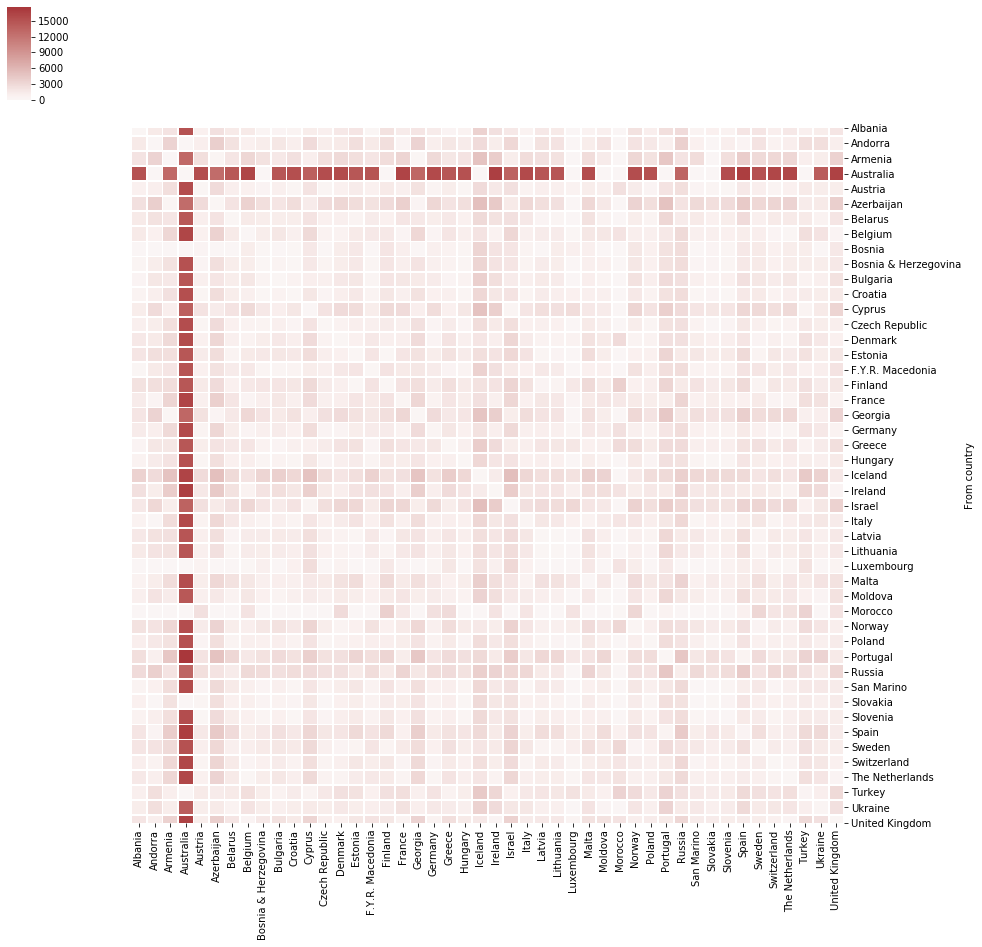

In [19]:
#avg distances
avg_dist_by_countries_pairs = votes_with_dist\
                                [['From country', 'To country', 'distw']]\
                                .groupby(['From country', 'To country']).mean().unstack('To country')
# Reset multiple column levels
avg_dist_by_countries_pairs.columns = [country for _, country in avg_dist_by_countries_pairs.columns]

# Note: note entirely accurate because of years when some countries have not particpated
avg_dist_by_countries_pairs = avg_dist_by_countries_pairs.fillna(value=-1)


# Draw the full plot
sns.clustermap(avg_dist_by_countries_pairs, center=0, cmap="vlag",
               row_cluster=False, col_cluster=False,
               linewidths=.75, figsize=(15, 15))

In [20]:
avg_dist_by_countries_pairs

,Albania,Andorra,Armenia,Australia,Austria,Azerbaijan,Belarus,Belgium,Bosnia & Herzegovina,Bulgaria,...,San Marino,Slovakia,Slovenia,Spain,Sweden,Switzerland,The Netherlands,Turkey,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,73.1558,1523.71800,2084.60600,15208.50,848.8387,2437.0570,1517.9090,1609.06800,376.4586,464.8647,...,680.586200,841.7741,691.61040,1931.6820,1995.4120,1169.5410,1652.26800,1048.1700,1369.8450,2040.1870
Andorra,1523.7180,11.22738,3565.94600,-1.00,1229.5780,3903.9070,2303.1120,955.18200,1340.7820,1910.9700,...,899.930400,-1.0000,1128.72800,519.3864,2067.3320,701.2180,1101.21300,2559.9690,2542.0250,1140.9470
Armenia,2084.6050,3565.94600,63.15974,13188.62,2481.7130,370.3409,1943.5700,3303.21800,2229.7840,1659.6770,...,2667.679000,-1.0000,2489.55700,3994.3180,2899.1910,3033.8510,3263.71600,1108.1820,1327.0380,3707.2160
Australia,15208.5000,-1.00000,13188.62000,-1.00,15608.4200,12862.6600,14713.9200,16319.19000,-1.0000,14823.5700,...,-1.000000,-1.0000,15646.59000,17072.9200,15385.4000,16170.0900,16227.45000,-1.0000,14308.3200,16602.2700
Austria,848.8388,1229.57800,2481.71300,15608.42,153.2575,2790.6510,1101.0930,858.16820,485.1447,963.8865,...,508.312400,294.7693,240.51560,1703.0550,1228.4730,576.4147,864.55130,1640.4770,1338.2860,1290.5610
Azerbaijan,2437.0570,3903.90700,370.34090,12862.66,2790.6510,142.4144,2152.4420,3594.73900,2565.5470,2004.4020,...,3004.276000,2524.0620,2812.43800,4337.4320,3101.1470,3351.2900,3545.70700,1463.2330,1566.3120,3987.3830
Belarus,1517.9090,2303.11200,1943.57000,14713.92,1101.0930,2152.4420,213.5423,1634.87500,1282.4630,1242.3340,...,1562.741000,847.2436,1258.39000,2769.8950,986.4767,1610.0230,1541.14600,1625.8840,701.2996,1957.3550
Belgium,1609.0680,955.18200,3303.21800,16319.19,858.1682,3594.7390,1634.8750,66.77504,1261.8970,1804.2530,...,984.612700,1083.6660,932.72420,1356.5670,1151.5000,503.0689,160.92830,2485.4400,2073.1670,448.2817
Bosnia,-1.0000,-1.00000,-1.00000,-1.00,485.1447,-1.0000,-1.0000,1261.89700,103.9527,-1.0000,...,-1.000000,514.1002,336.38620,1788.5260,1644.5950,859.0802,1293.71100,1273.4980,-1.0000,1697.1750


In [21]:
#np.corrcoef(avg_votes_by_countries_pairs,avg_dist_by_countries_pairs)

In [22]:
# Trying the (dist, country) thing
tempy = avg_dist_by_countries_pairs.values.flatten()
tempx = avg_votes_by_countries_pairs.values.flatten()

[(0, 12)]

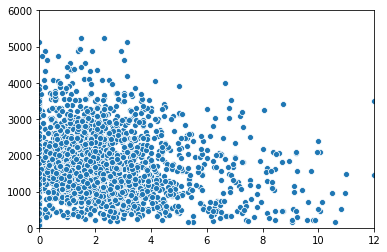

In [23]:
x = sns.scatterplot(x=tempx, y=tempy)
x.set(ylim=(0, 6000))
x.set(xlim=(0, 12))

In [24]:
np.corrcoef(tempx,tempy)

array([[1.        , 0.19990013],
       [0.19990013, 1.        ]])

### Analysis of Votes vs. Country Distances

We did not find a significant correlation between the average between each country-pair and the distances between the countries in the country pair. Howeer, we believe that if we only consider values that are above a certain threshold (when compared with the average points that the country gets from all other countries and years), we will find some correlation. We will create further visualizations / analysis to test this new hypothesis.